# BOFdat step3

## Finding specie-specific metabolic end goals

In [1]:
from BOFdat import step3
import pandas as pd
import cobra
import os

## Example using the *E.coli* genome-scale model *i*ML1515 and the biomass objective function generate in BOFdat step2

Metabolic end goals may vary considerably from one specie to another. For instance, the peptidoglycan that are present on the surface of *E.coli* may be slightly different in another gram-negative bacteria and completely absent from a gram-positive. This example is obvious for components that define the cell's visible phenotype but what should one do when the metabolites do not completely change the cell's phenotype. The identification of these seemingly invisible specie-specific crucial metabolites is the goal of the Step3 of BOFdat.

Using the metaheuristic genetic algorithm, BOFdat finds the biomass composition that allows to best replicate gene essentiality.

### Steps

1. Generate an initial population

2. Generate optimal biomass compositions

3. Cluster the metabolic end goals

4. Determine stoichiometric coefficients

5. Update


### Generate an initial population

In BOFdat step3, a genetic algorithm is implemented to define the optimal biomass composition. The individuals subjected to the evolution are indexed boolean lists where each position correspond to a defined metabolite. The genetic algorithm requires that an initial population of these individuals be generated. To do so BOFdat first screens the entire model for solvable metabolites and then generates lists of metabolites (inviduals).


In [2]:
#Inputs to generate the initial population
population_name = 'data/Populations/test_pop'
path_to_model = 'data/iML1515.json'
base_biomass_path = 'data/bofdat_step2.csv'
exp_essentiality_path = 'data/glucose_essentiality.csv'

In [3]:
step3.generate_initial_population(population_name,
                                  path_to_model,
                                  base_biomass_path,
                                  exp_essentiality_path,
                                  number_of_populations=5)

Assessing individual metabolite solvability
4


/home/jean-christophe/.local/lib/python2.7/site-packages/BOFdat-0.2.0-py2.7.egg/BOFdat/util/update.py:20 UserWarning: File has 3 columns, assuming index on first column


(<Metabolite 2pg_c at 0x7f3b146d5b10>, True)
(<Metabolite 13dpg_c at 0x7f3b07e41e50>, True)
(<Metabolite prbamp_c at 0x7f3b07e41ed0>, True)
(<Metabolite grdp_c at 0x7f3b14c7b050>, True)
(<Metabolite dms_e at 0x7f3b07e41e90>, False)
(<Metabolite fpram_c at 0x7f3b07e41e10>, True)
(<Metabolite dcyt_p at 0x7f3b157e0bd0>, False)
(<Metabolite fum_p at 0x7f3b146d5cd0>, True)
(<Metabolite tyr__L_p at 0x7f3b146d5b50>, True)
(<Metabolite feenter_e at 0x7f3b07e41fd0>, True)
(<Metabolite gg4abut_c at 0x7f3b5d4c3f10>, True)
(<Metabolite arbtn_e at 0x7f3b146d5dd0>, False)
(<Metabolite aso3_c at 0x7f3b146d5ed0>, False)
(<Metabolite cpgn_un_e at 0x7f3b146d5690>, False)
(<Metabolite alaala_e at 0x7f3b146d5410>, True)
(<Metabolite 3ohexACP_c at 0x7f3b146d5510>, False)
(<Metabolite 3ocddec5eACP_c at 0x7f3b146d5310>, False)
(<Metabolite clpn120_p at 0x7f3b146d5a50>, True)
(<Metabolite apg141_c at 0x7f3b15d6a910>, True)
(<Metabolite dca_c at 0x7f3b15d6a810>, True)
(<Metabolite dkdglcn_c at 0x7f3b15d6a210>,

(<Metabolite hdcoa_c at 0x7f3b15a7f450>, True)
(<Metabolite o16a4colipa_e at 0x7f3b15aadc90>, False)
(<Metabolite udcpgl_c at 0x7f3b141421d0>, True)
(<Metabolite mepn_c at 0x7f3b07ea6410>, False)
(<Metabolite mepn_p at 0x7f3b15a9b7d0>, False)
(<Metabolite cyst__L_c at 0x7f3b07ea6ad0>, True)
(<Metabolite dutp_c at 0x7f3b141420d0>, True)
(<Metabolite dmlz_c at 0x7f3b15a9bed0>, True)
(<Metabolite pan4p_c at 0x7f3b07ea6310>, True)
(<Metabolite adprib_c at 0x7f3b07ea6ed0>, True)
(<Metabolite quln_c at 0x7f3b07ea6bd0>, True)
(<Metabolite dxyl_c at 0x7f3b07ea6fd0>, False)
(<Metabolite dhptd_c at 0x7f3b15a9bbd0>, True)
(<Metabolite lipa_c at 0x7f3b15a94110>, True)
(<Metabolite sheme_c at 0x7f3b07ea66d0>, True)
(<Metabolite all__D_p at 0x7f3b07ea6dd0>, False)
(<Metabolite h2o_p at 0x7f3b15a94710>, True)
(<Metabolite hdca_p at 0x7f3b141423d0>, True)
(<Metabolite gal1p_p at 0x7f3b15a94510>, False)
(<Metabolite g3pe_e at 0x7f3b15a94910>, True)
(<Metabolite anhm3p_c at 0x7f3b15a94410>, True)
(<Meta

(<Metabolite pac_c at 0x7f3b15a32150>, False)
(<Metabolite 3hpppn_e at 0x7f3b15a04b10>, False)
(<Metabolite ctbt_c at 0x7f3b15a36490>, False)
(<Metabolite tdeACP_c at 0x7f3b15a36290>, False)
(<Metabolite 23dhba_c at 0x7f3b15a36190>, True)
(<Metabolite ddcacoa_c at 0x7f3b15a36690>, True)
(<Metabolite his__L_p at 0x7f3b15a36990>, True)
(<Metabolite no2_p at 0x7f3b14142a10>, False)
(<Metabolite cd2_e at 0x7f3b15a36b90>, False)
(<Metabolite Nmtrp_c at 0x7f3b15a32a50>, False)
(<Metabolite icolipa_c at 0x7f3b15a36c90>, True)
(<Metabolite crn__D_p at 0x7f3b15a36590>, False)
(<Metabolite cd2_p at 0x7f3b14142910>, False)
(<Metabolite 2doxg6p_c at 0x7f3b15a36890>, False)
(<Metabolite murein4px4p4p_p at 0x7f3b15a36a90>, True)
(<Metabolite dt5hsu_c at 0x7f3b15673090>, False)
(<Metabolite slnt_p at 0x7f3b157590d0>, True)
(<Metabolite hgmeACP_c at 0x7f3b15a32350>, False)
(<Metabolite ttrcyc_p at 0x7f3b157591d0>, False)
(<Metabolite 2sephchc_c at 0x7f3b157596d0>, True)
(<Metabolite dhps_c at 0x7f3b15

(<Metabolite 12ppd__R_c at 0x7f3b15a4add0>, True)
(<Metabolite dad_5_c at 0x7f3b15bf6350>, True)
(<Metabolite LalaDgluMdap_p at 0x7f3b15a3f190>, True)
(<Metabolite hhlipa_c at 0x7f3b15a4afd0>, True)
(<Metabolite crnDcoa_c at 0x7f3b15bf6250>, False)
(<Metabolite zn2_c at 0x7f3b14142e10>, True)
(<Metabolite skm_e at 0x7f3b14142f50>, False)
(<Metabolite 3odecACP_c at 0x7f3b15bf6650>, False)
(<Metabolite 1tdecg3p_c at 0x7f3b15bf6150>, True)
(<Metabolite pa140_c at 0x7f3b14142ed0>, True)
(<Metabolite cdpdtdec7eg_c at 0x7f3b14142b90>, True)
(<Metabolite 2agpe140_c at 0x7f3b15bd6c10>, True)
(<Metabolite teo2_c at 0x7f3b15bf6850>, False)
(<Metabolite 2aobut_c at 0x7f3b14142fd0>, True)
(<Metabolite 4r5au_c at 0x7f3b14142ad0>, True)
(<Metabolite gam_e at 0x7f3b15bf6750>, False)
(<Metabolite met__L_e at 0x7f3b15bf6950>, True)
(<Metabolite 4hbz_c at 0x7f3b159d1390>, True)
(<Metabolite dscl_c at 0x7f3b15bf6c50>, True)
(<Metabolite phthr_c at 0x7f3b15bd6f10>, True)
(<Metabolite acmana_e at 0x7f3b15b

(<Metabolite man6p_e at 0x7f3b15b39d90>, False)
(<Metabolite csn_p at 0x7f3b15b5e9d0>, False)
(<Metabolite cytd_p at 0x7f3b15b77f50>, True)
(<Metabolite fuc__L_p at 0x7f3b15710410>, False)
(<Metabolite mal__L_p at 0x7f3b15710510>, True)
(<Metabolite tmao_p at 0x7f3b15710210>, False)
(<Metabolite hxa_p at 0x7f3b15b5ecd0>, True)
(<Metabolite mobd_p at 0x7f3b15b5e8d0>, True)
(<Metabolite g1p_p at 0x7f3b15710610>, False)
(<Metabolite anhgm3p_c at 0x7f3b15b39090>, True)
(<Metabolite ggagicolipa_c at 0x7f3b15710310>, True)
(<Metabolite pser__L_p at 0x7f3b15710910>, False)
(<Metabolite fe3dhbzs_p at 0x7f3b15710110>, False)
(<Metabolite cu_e at 0x7f3b15710a10>, False)
(<Metabolite cdpdtdecg_c at 0x7f3b07a94110>, True)
(<Metabolite pe120_c at 0x7f3b15710d10>, True)
(<Metabolite pa120_p at 0x7f3b07a94650>, True)
(<Metabolite ddcap_c at 0x7f3b15710810>, True)
(<Metabolite hdcap_c at 0x7f3b15b5edd0>, True)
(<Metabolite egmeACP_c at 0x7f3b15710e10>, False)
(<Metabolite cph4_c at 0x7f3b15710710>, Tr

(<Metabolite hpyr_c at 0x7f3b1568ce10>, True)
(<Metabolite tartr__L_e at 0x7f3b07a94690>, False)
(<Metabolite cbi_c at 0x7f3b140d6d90>, False)
(<Metabolite octa_e at 0x7f3b140d6c90>, False)
(<Metabolite gdp_e at 0x7f3b07a94c50>, False)
(<Metabolite dmso_p at 0x7f3b15c0cf50>, False)
(<Metabolite gdp_p at 0x7f3b1561e6d0>, False)
(<Metabolite 4hoxpacd_e at 0x7f3b1561e0d0>, False)
(<Metabolite acser_p at 0x7f3b140d6890>, True)
(<Metabolite cdpdodecg_c at 0x7f3b140d6290>, True)
(<Metabolite ps140_c at 0x7f3b1561e3d0>, True)
(<Metabolite 2tdecg3p_c at 0x7f3b1561e5d0>, True)
(<Metabolite 2tdec7eg3p_c at 0x7f3b15727f50>, True)
(<Metabolite bmocogdp_c at 0x7f3b1561ead0>, True)
(<Metabolite mththf_e at 0x7f3b1561ebd0>, True)
(<Metabolite dhptdp_c at 0x7f3b1561e8d0>, True)
(<Metabolite cholate_c at 0x7f3b1561e7d0>, False)
(<Metabolite puacgam_c at 0x7f3b1561ecd0>, True)
(<Metabolite fum_c at 0x7f3b15611110>, True)
(<Metabolite spmd_c at 0x7f3b07a94d50>, True)
(<Metabolite 3dhq_c at 0x7f3b1561edd0

(<Metabolite gal1p_e at 0x7f3b14200950>, False)
(<Metabolite LalaDglu_c at 0x7f3b15978510>, True)
(<Metabolite acglc__D_c at 0x7f3b14200c50>, True)
(<Metabolite r5p_p at 0x7f3b14200d50>, False)
(<Metabolite r5p_e at 0x7f3b15978810>, False)
(<Metabolite acser_e at 0x7f3b14200b50>, True)
(<Metabolite mn2_p at 0x7f3b142f8390>, True)
(<Metabolite 3hpalmACP_c at 0x7f3b14200850>, False)
(<Metabolite 12dgr140_c at 0x7f3b07ffde50>, True)
(<Metabolite apg161_c at 0x7f3b15978710>, True)
(<Metabolite tartr__D_e at 0x7f3b14200750>, False)
(<Metabolite r2hglut_c at 0x7f3b14200150>, True)
(<Metabolite 5phua_c at 0x7f3b14200e50>, False)
(<Metabolite uppg3_c at 0x7f3b142f8490>, True)
(<Metabolite 3hocoa_c at 0x7f3b142f8190>, True)
(<Metabolite uagmda_c at 0x7f3b07f81190>, True)
(<Metabolite his__L_e at 0x7f3b142f8790>, True)
(<Metabolite hxan_e at 0x7f3b07f81090>, True)
(<Metabolite na1_e at 0x7f3b15978f10>, True)
(<Metabolite fmn_e at 0x7f3b142f8990>, True)
(<Metabolite glyc3p_e at 0x7f3b142f8d90>, T

(<Metabolite trnaglu_c at 0x7f3b07ed7d10>, False)
(<Metabolite ins_e at 0x7f3b141a3690>, True)
(<Metabolite q8_c at 0x7f3b07ed7810>, True)
(<Metabolite orn_c at 0x7f3b141a3790>, True)
(<Metabolite 2ombzl_c at 0x7f3b07ed7e10>, True)
(<Metabolite gthox_e at 0x7f3b07f17050>, False)
(<Metabolite etha_c at 0x7f3b07ed7910>, True)
(<Metabolite betald_c at 0x7f3b07effdd0>, False)
(<Metabolite hdca_c at 0x7f3b141a3090>, True)
(<Metabolite fgam_c at 0x7f3b07f17250>, True)
(<Metabolite dd2coa_c at 0x7f3b07eff0d0>, True)
(<Metabolite iasp_c at 0x7f3b07f817d0>, True)
(<Metabolite fru_p at 0x7f3b07f17450>, False)
(<Metabolite indole_p at 0x7f3b07f17550>, True)
(<Metabolite ppal_c at 0x7f3b14368790>, False)
(<Metabolite 12dgr161_c at 0x7f3b07f17350>, True)
(<Metabolite tartr__D_c at 0x7f3b07f17850>, False)
(<Metabolite 3oxdhscoa_c at 0x7f3b07ed7f10>, False)
(<Metabolite gslnt_c at 0x7f3b07f17950>, True)
(<Metabolite ampnt_c at 0x7f3b07ed7610>, False)
(<Metabolite f6p_c at 0x7f3b07f17b50>, True)
(<Met

(<Metabolite ribflv_c at 0x7f3b07f81b90>, True)
(<Metabolite lac__L_e at 0x7f3b142531d0>, True)
(<Metabolite so4_c at 0x7f3b07f81d50>, True)
(<Metabolite itp_c at 0x7f3b142536d0>, True)
(<Metabolite 2mcit_c at 0x7f3b1556b810>, True)
(<Metabolite dtdpglu_c at 0x7f3b15551890>, True)
(<Metabolite g3pi_c at 0x7f3b14253cd0>, False)
(<Metabolite h2mb4p_c at 0x7f3b142530d0>, True)
(<Metabolite galct__D_p at 0x7f3b1423c210>, False)
(<Metabolite glcur_p at 0x7f3b14253ed0>, False)
(<Metabolite maltpt_p at 0x7f3b1423c310>, False)
(<Metabolite so4_p at 0x7f3b15551d90>, True)
(<Metabolite feoxam_un_c at 0x7f3b14253fd0>, False)
(<Metabolite mso3_c at 0x7f3b15571c50>, False)
(<Metabolite Sfglutth_c at 0x7f3b15551990>, False)
(<Metabolite pe140_c at 0x7f3b1423c610>, True)
(<Metabolite pgp120_c at 0x7f3b1423cb10>, True)
(<Metabolite clpn180_p at 0x7f3b07f81b50>, True)
(<Metabolite 2agpe180_p at 0x7f3b1423c910>, True)
(<Metabolite gam6p_p at 0x7f3b1423c410>, False)
(<Metabolite meoh_c at 0x7f3b1423c710>

(<Metabolite 3hcvac11eACP_c at 0x7f3b07f50a50>, False)
(<Metabolite sq_p at 0x7f3b14281590>, False)
(<Metabolite acampnt_c at 0x7f3b079f4150>, False)
(<Metabolite udp_c at 0x7f3b07f50750>, True)
(<Metabolite hxan_c at 0x7f3b14281990>, True)
(<Metabolite 25aics_c at 0x7f3b14281390>, True)
(<Metabolite melib_e at 0x7f3b07f81e90>, False)
(<Metabolite gdpfuc_c at 0x7f3b14281e90>, True)
(<Metabolite unaga_c at 0x7f3b14281f90>, True)
(<Metabolite maltttr_e at 0x7f3b07f419d0>, False)
(<Metabolite glcur_e at 0x7f3b07f50e50>, False)
(<Metabolite crncoa_c at 0x7f3b14281a90>, False)
(<Metabolite gbbtn_e at 0x7f3b14281890>, False)
(<Metabolite 4abz_c at 0x7f3b07f57910>, True)
(<Metabolite cbl1_p at 0x7f3b079f4050>, False)
(<Metabolite enter_e at 0x7f3b07f50b50>, True)
(<Metabolite colipa_c at 0x7f3b142833d0>, True)
(<Metabolite 2dglc_c at 0x7f3b142836d0>, False)
(<Metabolite 3omrsACP_c at 0x7f3b142830d0>, False)
(<Metabolite pgp181_c at 0x7f3b142831d0>, True)
(<Metabolite cpe180_c at 0x7f3b142839d

(<Metabolite cm_e at 0x7f3b14134e50>, False)
(<Metabolite fe3dhbzs3_p at 0x7f3b079f42d0>, False)
(<Metabolite dxylnt_c at 0x7f3b14063bd0>, False)
(<Metabolite urdgci_c at 0x7f3b14063ed0>, True)
(<Metabolite co2_c at 0x7f3b079f4490>, True)
(<Metabolite 4ppcys_c at 0x7f3b1403b650>, True)
(<Metabolite alltt_c at 0x7f3b079f4910>, True)
(<Metabolite fum_e at 0x7f3b1403b050>, True)
(<Metabolite acald_e at 0x7f3b1403bd50>, True)
(<Metabolite 25drapp_c at 0x7f3b1403b750>, True)
(<Metabolite gthox_c at 0x7f3b1403bf50>, True)
(<Metabolite gar_c at 0x7f3b1403ba50>, True)
(<Metabolite enter_c at 0x7f3b14124910>, True)
(<Metabolite fe3hox_p at 0x7f3b079f48d0>, False)
(<Metabolite lald__D_c at 0x7f3b14283dd0>, True)
(<Metabolite fe3hox_un_e at 0x7f3b14044e10>, False)
(<Metabolite pydxn_e at 0x7f3b1403b550>, False)
(<Metabolite tym_e at 0x7f3b1404b490>, False)
(<Metabolite 3ooctACP_c at 0x7f3b1404b690>, False)
(<Metabolite 1odecg3p_c at 0x7f3b1403b850>, True)
(<Metabolite 2agpe120_p at 0x7f3b1403bc50

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sk

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sk

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:516 RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/sk

[u'athtp_c', u'uaagmda_c', u'uagmda_c', u'thmpp_c', u'btn_c', u'dann_c', u'thmmp_c', u'dtbt_c', u'kdo2lipid4_e', u'cxsam_c', u'malcoame_c', u'um4p_c', u'malcoa_c', u'5mta_c', u'enlipa_e', u'murein5px4p_p', u'murein4px4p_p', u'murein4px4px4p_p', u'murein4px4p4p_p', u'murein5px4px4p_p', u'murein3px4p_p', u'lipa_cold_e', u'lipa_e', u'amet_c', u'sbzcoa_c', u'ugmda_c', u'murein5p5p_p', u'murein5p4p_p', u'murein5p5p5p_p', u'anhgm4p_p', u'murein3px3p_p', u'murein4p4p_p', u'murein3p3p_p', u'murein5p3p_p', u'murein4p3p_p', u'anhgm3p_p', u'murein5px3p_p', u'ametam_c', u'5fthf_c', u'14dhncoa_c', u'ugmd_c', u'4mpetz_c', u'anhgm4p_c', u'ahcys_c', u'anhgm3p_c', u'methf_c', u'5mthf_c', u'hx2coa_c', u'3hhdcoa_c', u'btcoa_c', u'tdcoa_c', u'td2coa_c', u'ppcoa_c', u'3hodcoa_c', u'3hhcoa_c', u'hdcoa_c', u'3ohcoa_c', u'aacoa_c', u'tdecoa_c', u'succoa_c', u'od2coa_c', u'stcoa_c', u'b2coa_c', u'3otdcoa_c', u'3htdcoa_c', u'ddcacoa_c', u'odecoa_c', u'hdd2coa_c', u'3hbcoa_c', u'pmtcoa_c', u'3ohdcoa_c', u'3ohodc

<BOFdat.core.initial_population.Individual instance at 0x7f3b1421f488>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44556560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44556a70>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44556368>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4458a2d8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4458a1b8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4458a128>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4458a098>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a96c8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a9560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a9bd8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a9098>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a9c20>
Im in loop 2 and I have 38 valid individuals
4
<BOFdat.core.initial_populatio

<BOFdat.core.initial_population.Individual instance at 0x7f3b1403e440>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b3f80>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14774dd0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44590908>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1403e638>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624710>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a0fc8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624f38>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624b48>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07b660e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07b66248>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44625fc8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624098>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44625f38>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b1a06c680>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b4128>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44590ab8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44590950>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4458a1b8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aeb48>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aef80>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ae0e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44590c68>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445909e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44590d40>
<BOFdat.core.initial_population.Individual instance at 0x7f3b444f27e8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44590ea8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ada70>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b07e8e2d8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07e8e200>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1473d7a0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07dca0e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a7bd8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14761950>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14708680>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07e8eb48>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14749b90>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07692950>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07e8a128>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07e8a290>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07e8a1b8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b147aa3b0>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b07f88f38>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445624d0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14761440>
<BOFdat.core.initial_population.Individual instance at 0x7f3b0746f5a8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44562440>
<BOFdat.core.initial_population.Individual instance at 0x7f3b146fc560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b155a00e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b155a0248>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140b3878>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44625f80>
<BOFdat.core.initial_population.Individual instance at 0x7f3b155a03b0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b444f85a8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b155a05a8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b155a6290>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b07a7e488>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445954d0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44590950>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445953b0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b3248>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b3f80>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140c31b8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140c3560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140c36c8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140c3320>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140c3998>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14761440>
<BOFdat.core.initial_population.Individual instance at 0x7f3b446245f0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44551368>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b1411dd40>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1411c098>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1411c200>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1411c368>
<BOFdat.core.initial_population.Individual instance at 0x7f3b147014d0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14761b90>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1411c560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14761170>
<BOFdat.core.initial_population.Individual instance at 0x7f3b147614d0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445624d0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1411c6c8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44625d40>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140ff050>
<BOFdat.core.initial_population.Individual instance at 0x7f3b140ff1b8>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b445b0950>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b0830>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b0758>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ad950>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ad7a0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445adf80>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ad320>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ad830>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ad0e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ad8c0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ada70>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4453f128>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4453f098>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445514d0>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b0791d560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445abcf8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b0791d128>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ab1b8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445954d0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ab8c0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44595290>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44595170>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624b48>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624710>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44624098>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aed40>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aba70>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b445ab200>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4454a710>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07a17170>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07a172d8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ab2d8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07a175a8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14755440>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07a17638>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07a179e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1476ea70>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07a1ad88>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4454a170>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1479ef38>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07a02128>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b44556368>
<BOFdat.core.initial_population.Individual instance at 0x7f3b07979cf8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b4170>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b41b8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b40e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b4fc8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b4320>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44625758>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44625ef0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b446257e8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ae518>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aeef0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ae320>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aed40>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b44604878>
<BOFdat.core.initial_population.Individual instance at 0x7f3b5dd83638>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14708cb0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a96c8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a9c20>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445a9bd8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b4fc8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aed40>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ae518>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445513f8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b073caf80>
<BOFdat.core.initial_population.Individual instance at 0x7f3b073cafc8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b073caef0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b15d3ccf8>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b14791050>
<BOFdat.core.initial_population.Individual instance at 0x7f3b1470ec68>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14755830>
<BOFdat.core.initial_population.Individual instance at 0x7f3b444f2560>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4454a830>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445aba70>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44562998>
<BOFdat.core.initial_population.Individual instance at 0x7f3b44562518>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4454ad40>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4452da70>
<BOFdat.core.initial_population.Individual instance at 0x7f3b0793cf80>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ab2d8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445ab320>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445abe18>
<BOFda

<BOFdat.core.initial_population.Individual instance at 0x7f3b077d8440>
<BOFdat.core.initial_population.Individual instance at 0x7f3b077d87a0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b41b8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b445b4128>
<BOFdat.core.initial_population.Individual instance at 0x7f3b06e88ab8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b147b09e0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b14742dd0>
<BOFdat.core.initial_population.Individual instance at 0x7f3b077feea8>
<BOFdat.core.initial_population.Individual instance at 0x7f3b077fe440>
<BOFdat.core.initial_population.Individual instance at 0x7f3b077fee60>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4454ad88>
<BOFdat.core.initial_population.Individual instance at 0x7f3b077fe098>
<BOFdat.core.initial_population.Individual instance at 0x7f3b077fe248>
<BOFdat.core.initial_population.Individual instance at 0x7f3b4454a5f0>
<BOFda

### Generate optimal biomass compositions

Each individual in the population defines a different biomass composition that can be evaluated for fitness. Here, the evaluation function is the gene essentiality prediction. Ideally the constraints applied by the biomass objective function on the model would force flux through certain reactions as it happens *in vivo*. Namely, metabolites that the cell need to produce in order to double should be represented in the biomass objective function. The *in silico* knock-out of genes would cut the flux through the reaction and the cell would not be able to grow, replicating *in vivo* gene essentiality.

Single-gene knock-out is executed for each biomass composition generated. Both *in vivo* and *in vitro* essentiality are converted in boolean vectors of essential and non-essential genes. The distance between the two vectors can then be determined using standard distance metrics (Hamming) or the Matthews Correlation Coefficient (MCC). The metric is used as a measure of fitness. The MCC is then maximized throughout the evolution, selecting biomass compositions that yield the highest. The standard genetic operators mutation and cross-over are operated on the inviduals to create genetic diversity.

In [3]:
#Files for the genetic algorithm
path_to_model = 'data/iML1515.json'
initial_population_path = 'data/Populations/test_pop_1.csv'
exp_essentiality_path = 'data/glucose_essentiality.csv'
base_biomass = 'data/bofdat_step2.csv'
logbook_name = 'data/Outputs/logbook_test_pop_1.csv'
hall_of_fame_name = 'data/Outputs/hof_test_pop_1.csv'

In [ ]:
step3.find_metabolites(path_to_model,
                       initial_population_path,
                       exp_essentiality_path,
                       base_biomass=True,logbook=True,history=False,processes=None,
                       logbook_name=logbook_name,hall_of_fame_name=hall_of_fame_name)

Using default GA parameters
initializing toolbox
{'fitness_size': -0.25, 'indpb': 0.005, 'MUTPB': 0.1, 'distance_measure': 'mcc', 'NGEN': 20, 'CXPB': 0.5, 'fitness_distance': 1.0}
made it to the GA
{'hall_of_fame_size': 1000, 'logbook_name': 'data/Outputs/logbook_test_pop_1.csv', 'hall_of_fame_name': 'data/Outputs/hof_test_pop_1.csv'}
I will evaluate the initial population
8
Fitnesses that will be attributed to individuals [(0.5831338574121917, 20), (0.6059394725741493, 20), (0.6393695697555211, 20), (0.6674475878654471, 20), (0.6769364729767546, 20), (0.5954531704191854, 20), (0.6663692082440766, 20), (0.6029438370809624, 20), (0.6119153310764769, 20), (0.6173702451382262, 20), (0.6624072660575369, 20), (0.7021886829961169, 20), (0.6262830123495685, 20), (0.6637836843155994, 20), (0.7072431657430097, 20), (0.6236043104240845, 20), (0.6537646020336324, 20), (0.6386318032265479, 20), (0.6311775953880013, 20), (0.6313771731445313, 20), (0.62898418389611, 20), (0.6962006490528011, 20), (0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python2.7/inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/usr/lib/python2.7/inspect.py", line 497, in getmodule
    f = getabsfile(module)
  File

IndexError: string index out of range

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 637, in _abort_queues
    self._abort_queue(stream)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 662, in _abort_queue
    poll

### Cluster the metabolic end goals

The output of a genetic algorithm may vary from one initial population to another. To get a sense of what would be an optimal result, it is generally advised to run more than one evolution and aggregate the results. BOFdat does so by clustering the metabolites that appeared most frequently in the optimal result of every evolution. The distance matrix for every metabolite in the network is generated and reduced to the most frequent metabolites. Hierarchical clustering is then applied to the reduced distance matrix in order to generate clusters of metabolic end goals that can be used for curation.

In [2]:
#Necessary inputs
outpath = 'data/Outputs/'
path_to_model = 'data/iML1515.json'
CONNECTIVITY_THRESHOLD = 15
BASELINE=0.77
show_frequency = True
show_matrix = True

{'frequency_fig_name': 'data/Outputs/frequency_fig.svg', 'matrix_fig_name': 'data/Outputs/matrix_fig.svg'}


/home/jean-christophe/Documents/Maitrise_UCSD/BOFdat/BOFdat/core/group_end_goals.py:36 UserWarning: Unable to load file hof_random200_45.csv
/home/jean-christophe/.local/lib/python2.7/site-packages/pandas/core/frame.py:3790 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/sklearn/cluster/hierarchical.py:410 ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


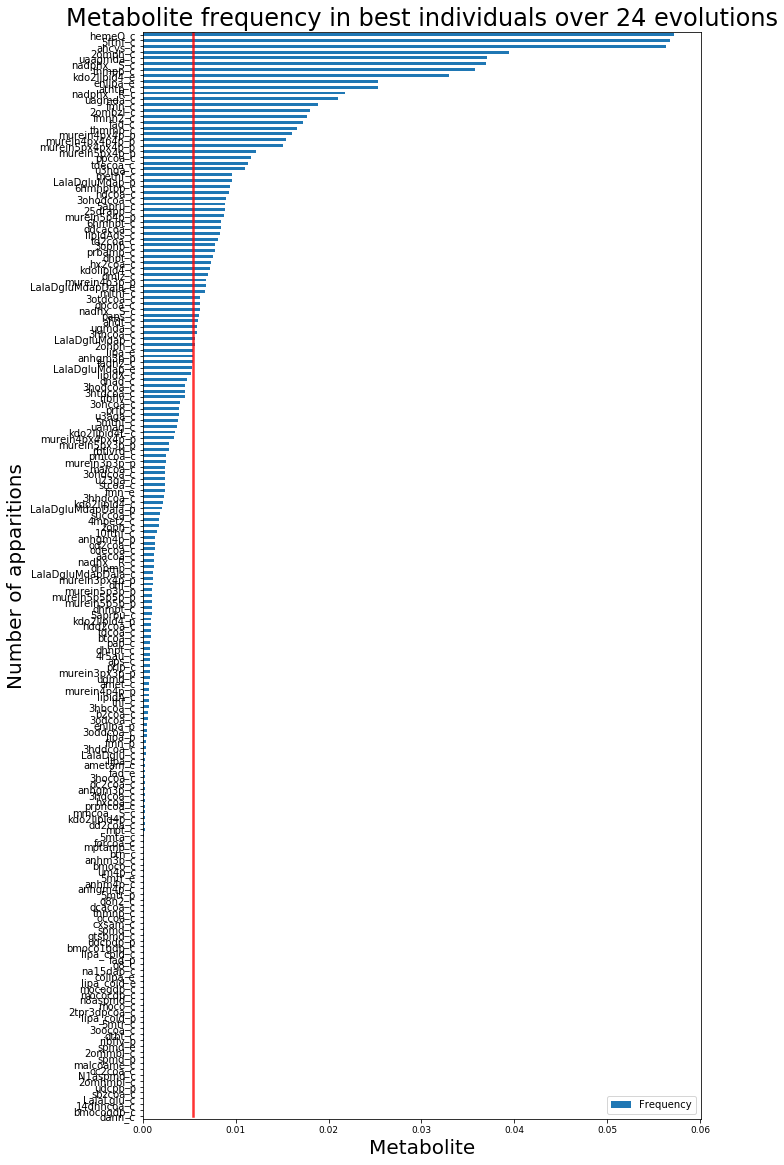

/home/jean-christophe/.local/lib/python2.7/site-packages/seaborn/matrix.py:603 ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


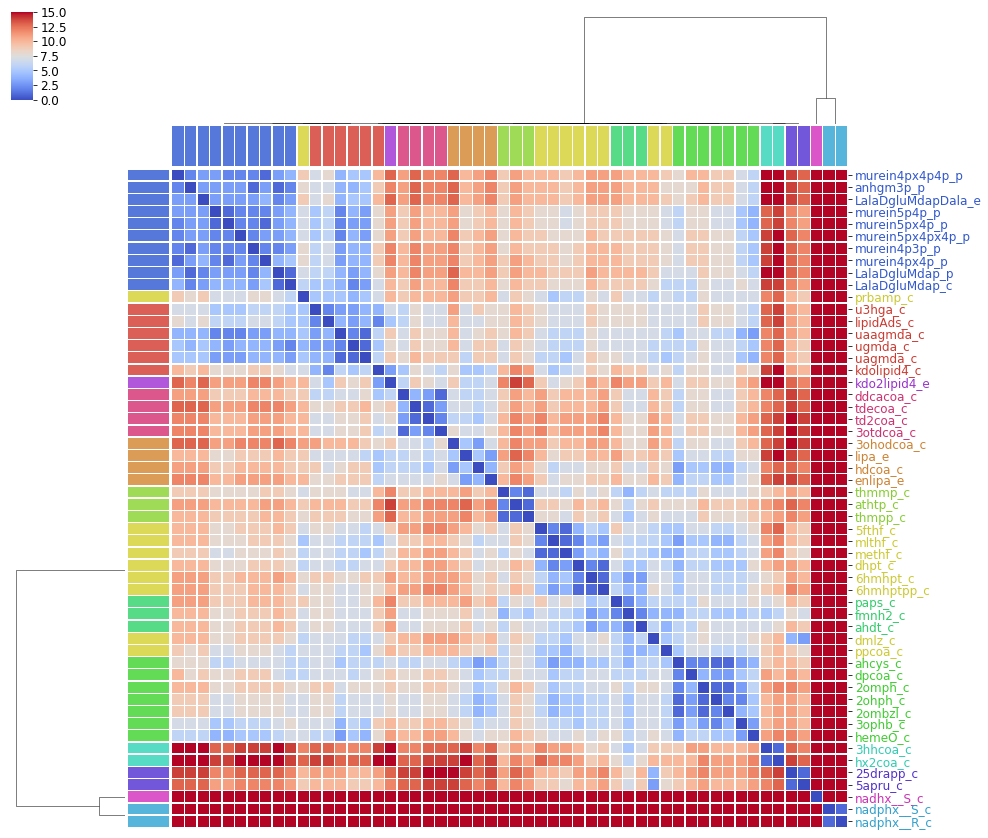

    Step 3 clusters
0                 6
1                 4
2                 9
3                 3
4                 7
5                 3
6                 2
7                 2
8                10
9                 2
10                1
11                1
12                4
                                                     metab  Step 3 clusters
cluster                                                                    
0        uaagmda_c, u3hga_c, ugmda_c, lipidAds_c, uagmd...                6
1                    lipa_e, 3ohodcoa_c, hdcoa_c, enlipa_e                4
2        5fthf_c, 6hmhpt_c, mlthf_c, dhpt_c, dmlz_c, me...                9
3                                athtp_c, thmmp_c, thmpp_c                3
4        2ohph_c, 2ombzl_c, 2omph_c, 3ophb_c, ahcys_c, ...                7
5                                  paps_c, fmnh2_c, ahdt_c                3
6                                       3hhcoa_c, hx2coa_c                2
7                                 na

In [3]:
#Run the genetic algorithm
selected_metabolites = step3.cluster_metabolites(outpath,
                              path_to_model,
                              CONNECTIVITY_THRESHOLD,
                              BASELINE,
                              show_frequency,
                              show_matrix,
                              frequency_fig_name=os.path.join(outpath,'frequency_fig.svg'),
                              matrix_fig_name=os.path.join(outpath,'matrix_fig.svg'))

In [4]:
selected_metabolites

['uaagmda_c',
 'enlipa_e',
 '5fthf_c',
 'thmpp_c',
 'hemeO_c',
 'fmnh2_c',
 'hx2coa_c',
 'nadphx__S_c',
 'murein4px4p_p',
 '5apru_c',
 'kdo2lipid4_e',
 'nadhx__S_c',
 'tdecoa_c']

### Determine stoichiometric coefficients

In [5]:
from BOFdat.util.update import determine_coefficients
WEIGHT_FRACTION = 0.05
model = cobra.io.load_json_model(path_to_model)
bd_step3 = determine_coefficients(selected_metabolites,model,WEIGHT_FRACTION)

### Update

In [6]:
#Get the input from the previous step
from BOFdat.util import update
path_to_biomass = 'data/bofdat_step2.csv'
bd_step2 = update.convert_to_dictionary(path_to_biomass)
bd_step3.update(bd_step2)
update.save_biomass(bd_step3,'data/bofdat_step3.csv')

/home/jean-christophe/Documents/Maitrise_UCSD/BOFdat/BOFdat/util/update.py:22 UserWarning: File has 3 columns, assuming index on first column


76